In [1]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
original_data = pd.read_csv('sonar.csv')

<IPython.core.display.Javascript object>

In [3]:
data = original_data.iloc[:,:].copy()

In [4]:
data.shape

(207, 61)

In [5]:
data.head()

,0.02,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.018,0.0084,0.009,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [6]:
data.R.value_counts()

M    111
R     96
Name: R, dtype: int64

In [7]:
data.isnull().sum().sum()

0

### Remark : No Missing Values

## Analysis

In [8]:
corr_mat = data.corr()

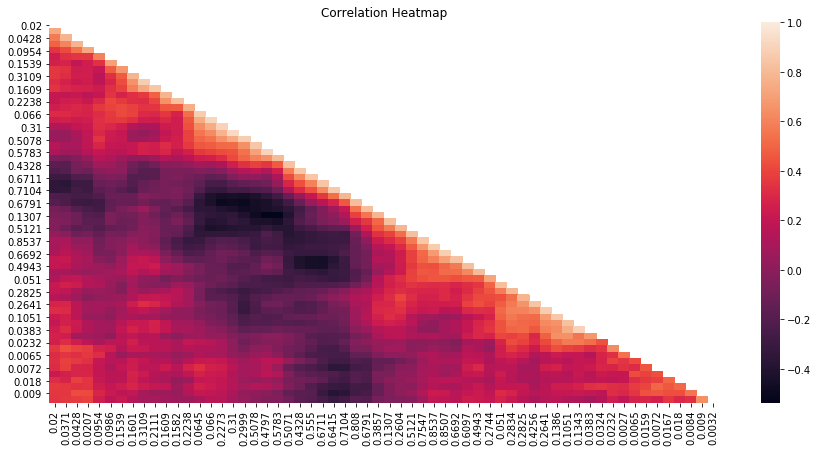

In [9]:
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,7))
sns.heatmap(corr_mat,mask=mask)
plt.title('Correlation Heatmap')
plt.show()

## Categorical to Numerical Transformation of Target Variable

In [10]:
dummies = pd.get_dummies(data['R'],drop_first=True)

<IPython.core.display.Javascript object>

In [11]:
# 1 means rock
# 0 means mine

In [12]:
new_data = data.drop('R',axis=1)

In [13]:
new_data['Target'] = dummies

In [14]:
# new_data.columns

In [15]:
y = new_data['Target']
X = new_data.drop('Target', axis = 1)

## Model

In [16]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.
C:\Users\IMPOSSIBLE\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\IMPOSSIBLE\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\IMPOSSIBLE\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\IMPOSSIBLE\Anaconda3\lib\site-packages\tensorflow\python

In [17]:
model = Sequential()

In [18]:
model.add(Dense(32,input_dim=60,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.fit(X,y,epochs=100,batch_size=10,verbose=0)

Instructions for updating:
Use tf.cast instead.


In [21]:
_,accuracy = model.evaluate(X,y,verbose=0)

In [22]:
print('Accuracy obtained : {:.2f} %'.format(accuracy*100))

Accuracy obtained : 98.55 %


## Spliting into Train and Test 

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=0)

In [25]:
_,acc = model.evaluate(X_test,y_test,verbose=0)

In [26]:
print('Accuracy obtained : {:.2f} %'.format(acc*100))

Accuracy obtained : 95.24 %


## Randomizing samples

In [27]:
epochs_ = 10
acc_list = []
for i in range(epochs_):
    new_data = new_data.sample(frac=1)
    y = new_data['Target']
    X = new_data.drop('Target', axis = 1)
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
    model.fit(X_train,y_train,epochs=100,batch_size=10,verbose=0)
    _,acc = model.evaluate(X_test,y_test,verbose=0)
    acc_list.append(acc)

In [28]:
print(max(acc_list)*100)

100.0


### We have implemented an ANN with 3 hidden layers and predicted the outputs.
### In the first run, we took the entire data and trained the model on it.
### In the second run, we splitted the data into 'train' and 'test' and performed the fitting to 'train' part and tested on the 'test' part to get an accuracy score of 95.24%
### In the third run we tried shuffling the dataset and following the 'train' and 'test' protocol and we achieved an accuracy score of 100%